<a href="https://colab.research.google.com/github/rjeannelas/Home_Sales/blob/main/Home_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df_copy = application_df.copy()

In [ ]:
# Determine the number of unique values in each column.
count_unique_columns = application_df.nunique()
print(count_unique_columns)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 1000
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_data = pd.get_dummies(application_df)
categorical_data.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
x = categorical_data.drop('IS_SUCCESSFUL', axis=1)
y = categorical_data['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

## Compile, Train and Evaluate the Model

In [ ]:
import tensorflow as tf

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='relu', input_dim=x_train.shape[1]))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                440       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = nn.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_test_scaled, y_test))

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.6183 - accuracy: 0.6838 - val_loss: 0.5706 - val_accuracy: 0.7258
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5648 - accuracy: 0.7263 - val_loss: 0.5636 - val_accuracy: 0.7247
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5586 - accuracy: 0.7280 - val_loss: 0.5596 - val_accuracy: 0.7256
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7290 - val_loss: 0.5591 - val_accuracy: 0.7255
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5539 - accuracy: 0.7289 - val_loss: 0.5561 - val_accuracy: 0.7263
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7299 - val_loss: 0.5571 - val_accuracy: 0.7275
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5516 - accuracy: 0.7303 - val_loss: 0.5565 - val_accuracy: 0.7271

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5532 - accuracy: 0.7279 - 421ms/epoch - 2ms/step
Loss: 0.5532156229019165, Accuracy: 0.7279300093650818


In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn.save('../21-Deep Learning/AlphabetSoupCharity.h5')
files.download('../21-Deep Learning/AlphabetSoupCharity.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Optimize the Model

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Make a copy of the working dataset
application_df_dropping = application_df_copy.copy()

print("Step 1 of 6 - Start... Samples: ", len(application_df_dropping), " | (No dummies) Columns/Features: ", len(application_df_dropping.columns))

Step 1 of 6 - Start... Samples:  34299  | (No dummies) Columns/Features:  10


In [ ]:
cutoff_value = 500
application_types_to_replace = application_df_dropping['APPLICATION_TYPE'].value_counts()[application_df_dropping['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

for app in application_types_to_replace:
    application_df_dropping['APPLICATION_TYPE'] = application_df_dropping['APPLICATION_TYPE'].replace(app,"Other")

cutoff_value2 = 500
classifications_to_replace = application_df_dropping['CLASSIFICATION'].value_counts()[application_df_dropping['CLASSIFICATION'].value_counts() < cutoff_value2].index.tolist()

for cls in classifications_to_replace:
    application_df_dropping['CLASSIFICATION'] = application_df_dropping['CLASSIFICATION'].replace(cls,"Other")

print("Step 2 of 6 - Simplify 'APPLICATION_TYPE' & 'CLASSIFICATION'... Samples: ", len(application_df_dropping), " | (No dummies) Columns/Features: ", len(application_df_dropping.columns))


Step 2 of 6 - Simplify 'APPLICATION_TYPE' & 'CLASSIFICATION'... Samples:  34299  | (No dummies) Columns/Features:  10


In [ ]:
dummy_working_dropping_df = pd.get_dummies(application_df_dropping)
dummy_working_dropping_df.head(5)

print("Step 3 of 6 - Get Dummies... Samples: ", len(dummy_working_dropping_df), " | Columns/Features: ", len(dummy_working_dropping_df.columns))
dummy_working_dropping_df.head(5)

Step 3 of 6 - Get Dummies... Samples:  34299  | Columns/Features:  45


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


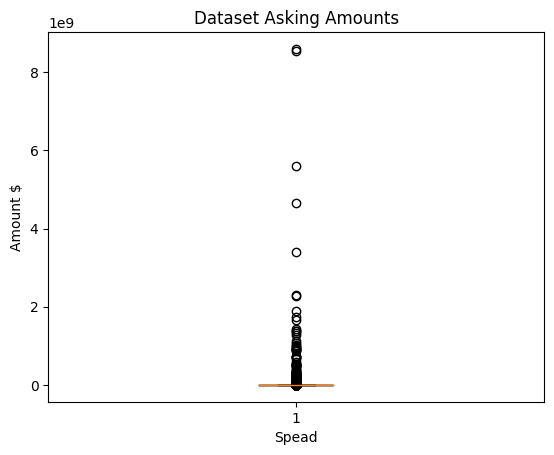

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Dataset Asking Amounts')
ax1.set_ylabel('Amount $')
ax1.set_xlabel('Spead')
ax1.boxplot(dummy_working_dropping_df['ASK_AMT'])
plt.show()

In [ ]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(dummy_working_dropping_df['ASK_AMT'],[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.45*iqr)
upper_bound = quartiles[1]+(1.45*iqr)
print("Lower boundry: ", lower_bound, " | Upper boundry: ", upper_bound)

potential_outliers = [AMT for AMT in dummy_working_dropping_df['ASK_AMT'] if AMT < lower_bound or AMT > upper_bound]
print("Samples in dataset prior to outlier removal: " + str(len(dummy_working_dropping_df['ASK_AMT'])))
print("After outlier removal: " + str(len(dummy_working_dropping_df['ASK_AMT']) - len(potential_outliers)))

Lower boundry:  1024.1  | Upper boundry:  11717.9
Samples in dataset prior to outlier removal: 34299
After outlier removal: 26078


In [ ]:
condensed_data = dummy_working_dropping_df[~dummy_working_dropping_df['ASK_AMT'].isin(potential_outliers)]
print("Step 4 of 6 - Remove rows where 'ASK_AMT' is an outlier... Samples: ", len(condensed_data), " | Columns/Features: ", len(condensed_data.columns))


Step 4 of 6 - Remove rows where 'ASK_AMT' is an outlier... Samples:  26078  | Columns/Features:  45


In [ ]:
x_dropping = condensed_data.drop('IS_SUCCESSFUL', axis=1)
y_dropping = condensed_data['IS_SUCCESSFUL']

x_train_column_drop, x_test_column_drop, y_train_column_drop, y_test_column_drop = train_test_split(x_dropping, y_dropping, test_size=0.25, random_state=1)

print("Step 5 of 6 - Split training and testing samples... Samples: ", len(x_train_column_drop), " | Columns/Features: ", len(x_train_column_drop.columns))

Step 5 of 6 - Split training and testing samples... Samples:  19558  | Columns/Features:  44


In [ ]:
# Create a Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_column_drop, y_train_column_drop)

lasso_predictions = lasso_model.predict(x_test_column_drop)
lasso_rmse = mean_squared_error(y_test_column_drop, lasso_predictions, squared=False)
print("Lasso RMSE:", lasso_rmse)

# Create a Ridge model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_column_drop, y_train_column_drop)

ridge_predictions = ridge_model.predict(x_test_column_drop)
ridge_rmse = mean_squared_error(y_test_column_drop, ridge_predictions, squared=False)
print("Ridge RMSE:", ridge_rmse)

print("- - -")

lasso_coeffs = lasso_model.coef_
ridge_coeffs = ridge_model.coef_

# Drop columns after failing Lasso and Ridge tests
drop_columns = []

Lower_Ridge = -0.005
Upper_Ridge = 0.005

for i in range(len(lasso_coeffs)):
    if lasso_coeffs[i] == 0 and ((ridge_coeffs[i] > Lower_Ridge and ridge_coeffs[i] <= 0) or (ridge_coeffs[i] < Upper_Ridge and ridge_coeffs[i] >= 0)):
        drop_columns.append(i)

print(drop_columns)
print("# of Columns/Features that will be dropped", len(drop_columns))

# remove columns from x1 df
x_train_column_drop = x_train_column_drop.drop(x_train_column_drop.columns[drop_columns], axis=1)
x_test_column_drop = x_test_column_drop.drop(x_test_column_drop.columns[drop_columns], axis=1)

print("Step 6 of 6 - Remove Columns that fail Lasso & Ridge Tests... Samples: ", len(x_train_column_drop), " | Columns/Features: ", len(x_train_column_drop.columns))

Lasso RMSE: 0.4993190478758795
Ridge RMSE: 0.43077885699297963
- - -
[]
# of Columns/Features that will be dropped 0
Step 6 of 6 - Remove Columns that fail Lasso & Ridge Tests... Samples:  19558  | Columns/Features:  42


In [ ]:
x_scaler_columns_dropped = scaler.fit(x_train_column_drop)

x_train_column_drop_scaled = x_scaler_columns_dropped.transform(x_train_column_drop)
x_test_column_drop_scaled = x_scaler_columns_dropped.transform(x_test_column_drop)

# Define the model
nn_column_drop = tf.keras.models.Sequential()

# First hidden layer
nn_column_drop.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=x_train_column_drop_scaled.shape[1]))

# Second hidden layer
nn_column_drop.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_column_drop.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_column_drop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3440      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_column_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_column_drop = nn_column_drop.fit(x_train_column_drop_scaled, y_train_column_drop, epochs=20, verbose=1, batch_size=16)

Epoch 1/20
1223/1223 [==============================] - 4s 2ms/step - loss: 0.5560 - accuracy: 0.7346
Epoch 2/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5397 - accuracy: 0.7436
Epoch 3/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5367 - accuracy: 0.7440
Epoch 4/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5343 - accuracy: 0.7452
Epoch 5/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7457
Epoch 6/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5318 - accuracy: 0.7467
Epoch 7/20
1223/1223 [==============================] - 3s 2ms/step - loss: 0.5322 - accuracy: 0.7467
Epoch 8/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5311 - accuracy: 0.7480
Epoch 9/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5303 - accuracy: 0.7469
Epoch 10/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.529

In [ ]:
model_loss, model_accuracy = nn_column_drop.evaluate(x_test_column_drop_scaled,y_test_column_drop,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 1ms/step - loss: 0.5400 - accuracy: 0.7552
Loss: 0.5400089621543884, Accuracy: 0.7552147507667542


###  Target predictive accuracy at 75.5%

In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn.save('../21-Deep Learning/AlphabetSoupCharity_Optinization.h5')
files.download('../21-Deep Learning/AlphabetSoupCharity_Optinization.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>